<a href="https://colab.research.google.com/github/Tongue923/Load_forecasting/blob/main/load_forecasting_with_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount the drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import data from google drive



In [2]:
ROOT_DIR = '/content/drive/My Drive/fyp'


In [3]:
import pandas as pd

data = pd.read_excel(f"{ROOT_DIR}/data/malaysia_all_data_for_paper.xlsx" )


In [4]:
data

,date,time,temperature,humidity,holiday,load
0,2009-01-01,01:00:00,24,100,0,30360
1,2009-01-01,02:00:00,24,100,0,29155
2,2009-01-01,03:00:00,24,94,0,28086
3,2009-01-01,04:00:00,24,94,0,28031
4,2009-01-01,05:00:00,24,94,0,27730
...,...,...,...,...,...,...
17515,2010-12-31,20:00:00,26,89,0,53819
17516,2010-12-31,21:00:00,26,83,0,51543
17517,2010-12-31,22:00:00,25,89,0,44961
17518,2010-12-31,23:00:00,24,94,0,38484


# Plot graph


In [5]:
df = pd.DataFrame(data)
data_sample = df.sample(n=30).sort_values(by='date')


In [6]:
data_sample['datetime'] = pd.to_datetime(data_sample['date'].astype(str) + ' ' + data_sample['time'].astype(str))


Text(0, 0.5, 'load')

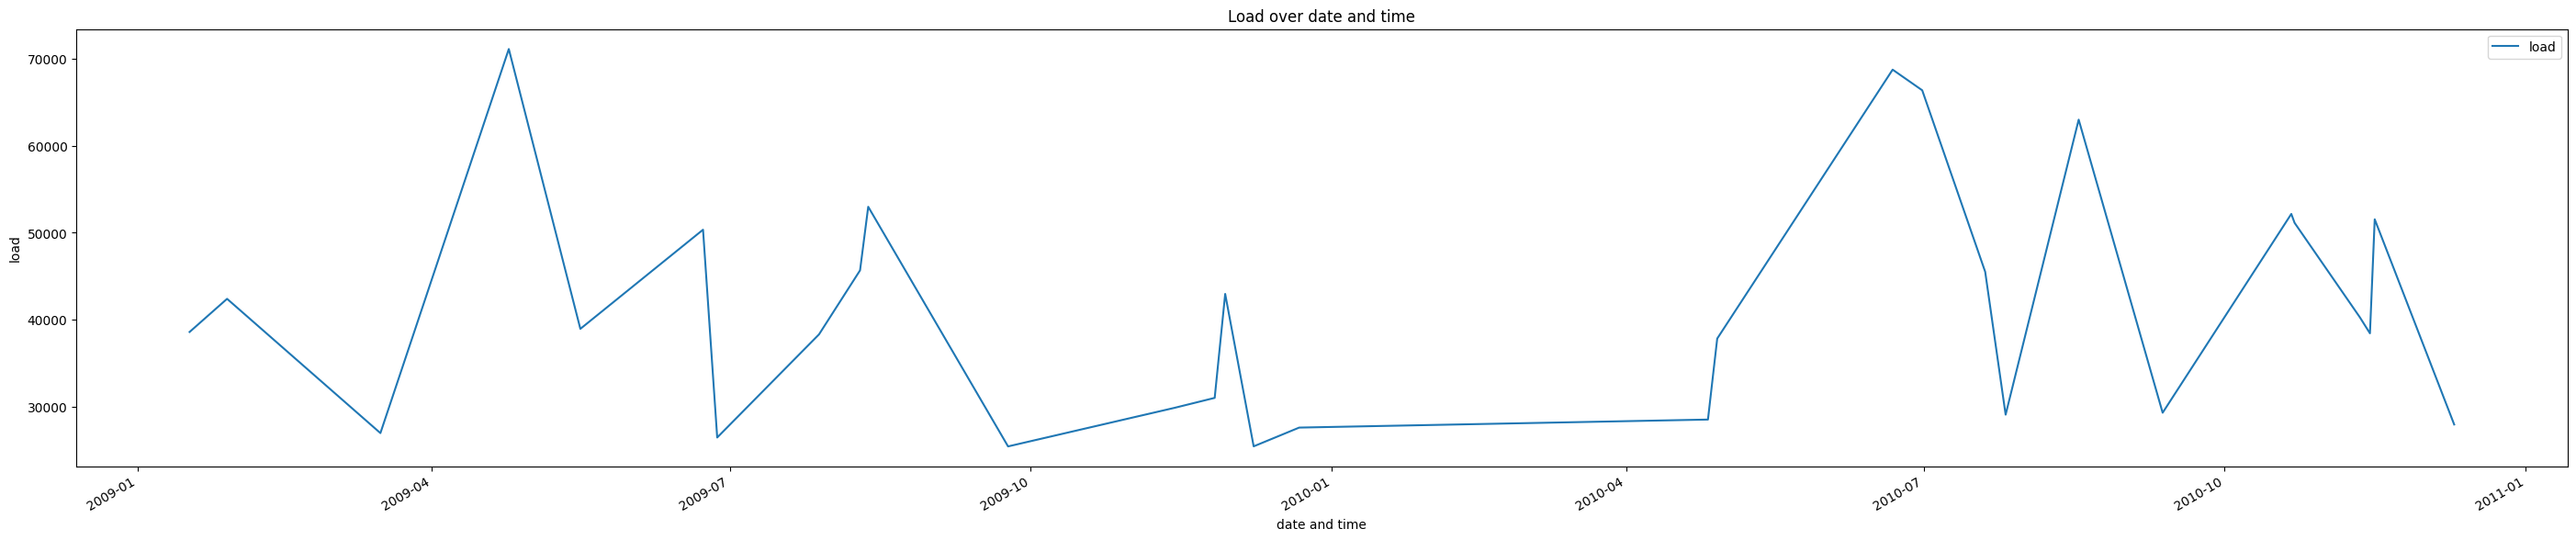

In [7]:
plt_data_sample = data_sample.plot(x='datetime', y='load',figsize=(35,7))
plt_data_sample.set_title("Load over date and time")
plt_data_sample.set_xlabel("date and time")
plt_data_sample.set_ylabel("load")


# Split data for training, validation and testing

In [8]:
from sklearn.model_selection import train_test_split

x, y = df.iloc[: , :-1], df.iloc[: , -1]

In [9]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, shuffle=False)

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test

(            date      time  temperature humidity  holiday
 0     2009-01-01  01:00:00           24      100        0
 1     2009-01-01  02:00:00           24      100        0
 2     2009-01-01  03:00:00           24      94         0
 3     2009-01-01  04:00:00           24      94         0
 4     2009-01-01  05:00:00           24      94         0
 ...          ...       ...          ...      ...      ...
 11207 2010-04-13  00:00:00           26      94         0
 11208 2010-04-13  01:00:00           26      94         0
 11209 2010-04-13  02:00:00           26      94         0
 11210 2010-04-13  03:00:00           26      94         0
 11211 2010-04-13  04:00:00           26      94         0
 
 [11212 rows x 5 columns],
 0        30360
 1        29155
 2        28086
 3        28031
 4        27730
          ...  
 11207    30538
 11208    29681
 11209    29479
 11210    29101
 11211    29446
 Name: load, Length: 11212, dtype: int64,
             date      time  temperature humi

# Train the model

In [11]:
X_train = x_train

In [12]:
x_train = X_train

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np



In [14]:
x_train['date'] = pd.to_datetime(x_train['date'].astype(str) + ' ' + x_train['time'].astype(str))
x_train = x_train.drop(['time'], axis=1)
x_train

,date,temperature,humidity,holiday
0,2009-01-01 01:00:00,24,100,0
1,2009-01-01 02:00:00,24,100,0
2,2009-01-01 03:00:00,24,94,0
3,2009-01-01 04:00:00,24,94,0
4,2009-01-01 05:00:00,24,94,0
...,...,...,...,...
11207,2010-04-13 00:00:00,26,94,0
11208,2010-04-13 01:00:00,26,94,0
11209,2010-04-13 02:00:00,26,94,0
11210,2010-04-13 03:00:00,26,94,0


In [15]:
x_train['date'] = pd.to_datetime(x_train['date']).astype('int64')
x_train = np.asarray(x_train).astype(np.float64)


In [16]:
y_train = np.asarray(y_train).astype(np.float64)


In [17]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))


In [18]:
y_train = np.expand_dims(y_train, axis=1)
y_train = np.reshape(y_train, (y_train.shape[0], 1, y_train.shape[1]))

In [19]:
x_train,y_train

(array([[[1.2307716e+18, 2.4000000e+01, 1.0000000e+02, 0.0000000e+00]],
 
        [[1.2307752e+18, 2.4000000e+01, 1.0000000e+02, 0.0000000e+00]],
 
        [[1.2307788e+18, 2.4000000e+01, 9.4000000e+01, 0.0000000e+00]],
 
        ...,
 
        [[1.2711240e+18, 2.6000000e+01, 9.4000000e+01, 0.0000000e+00]],
 
        [[1.2711276e+18, 2.6000000e+01, 9.4000000e+01, 0.0000000e+00]],
 
        [[1.2711312e+18, 2.6000000e+01, 9.4000000e+01, 0.0000000e+00]]]),
 array([[[30360.]],
 
        [[29155.]],
 
        [[28086.]],
 
        ...,
 
        [[29479.]],
 
        [[29101.]],
 
        [[29446.]]]))

In [20]:

model = Sequential()
model.add(LSTM(512, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(10, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam')



In [ ]:
model.fit(x_train, y_train, epochs=300, batch_size=1)

Epoch 1/300
 3911/11212 [=========>....................] - ETA: 2:02 - loss: 2163912704.0000